<a href="https://colab.research.google.com/github/tom5610/ai-ml-workshop/blob/main/tfbook/chapter02/fashion_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if (logs.get('accuracy') > 0.99):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

In [3]:
callbacks = myCallback()

In [4]:
data = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = data.load_data()
print(type(training_images))

<class 'numpy.ndarray'>


In [5]:
training_images.shape

(60000, 28, 28)

In [6]:
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255. 

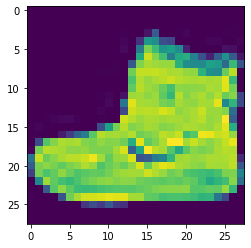

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.imshow(training_images[0].reshape(28, 28))
plt.show()

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [11]:
model.fit(training_images, training_labels, epochs = 50, callbacks = [callbacks])

Epoch 1/50
1875/1875 [==============================] - 101s 54ms/step - loss: 0.4394 - accuracy: 0.8397
Epoch 2/50
1875/1875 [==============================] - 102s 54ms/step - loss: 0.2945 - accuracy: 0.8927
Epoch 3/50
1875/1875 [==============================] - 99s 53ms/step - loss: 0.2484 - accuracy: 0.9086
Epoch 4/50
1875/1875 [==============================] - 93s 49ms/step - loss: 0.2157 - accuracy: 0.9192
Epoch 5/50
1875/1875 [==============================] - 93s 50ms/step - loss: 0.1902 - accuracy: 0.9287
Epoch 6/50
1875/1875 [==============================] - 98s 52ms/step - loss: 0.1675 - accuracy: 0.9366
Epoch 7/50
1875/1875 [==============================] - 97s 52ms/step - loss: 0.1474 - accuracy: 0.9448
Epoch 8/50
1875/1875 [==============================] - 95s 51ms/step - loss: 0.1290 - accuracy: 0.9506
Epoch 9/50
1875/1875 [==============================] - 93s 50ms/step - loss: 0.1154 - accuracy: 0.9561
Epoch 10/50
1875/1875 [==============================] - 93s 4

In [12]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 13ms/step - loss: 0.5742 - accuracy: 0.9143


[0.5742487907409668, 0.9143000245094299]

In [13]:
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

[3.0337514e-12 5.5824380e-11 9.7644408e-23 1.0679612e-20 3.3993129e-12
 2.9964475e-11 4.9105298e-21 7.6877610e-10 1.3821692e-15 1.0000000e+00]
9
